In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df = pd.read_csv('dia - diabetes_data_upload (1).csv')

In [5]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Obesity,class
0,40,Male,No,Yes,No,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,Positive


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Obesity             520 non-null    object
 7   class               520 non-null    object
dtypes: int64(1), object(7)
memory usage: 32.6+ KB


In [7]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Obesity               0
class                 0
dtype: int64

In [8]:
pd.get_dummies(df,drop_first=True)

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Obesity_Yes,class_Positive
0,40,True,False,True,False,True,True,True
1,58,True,False,False,False,True,False,True
2,41,True,True,False,False,True,False,True
3,45,True,False,False,True,True,False,True
4,60,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
515,39,False,True,True,True,False,False,True
516,48,False,True,True,True,True,False,True
517,58,False,True,True,True,True,True,True
518,32,False,False,False,False,True,False,False


In [9]:
le = LabelEncoder()

In [10]:
df['Gender_Male'] = le.fit_transform(df['Gender'])

In [11]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Obesity,class,Gender_Male
0,40,Male,No,Yes,No,Yes,Yes,Positive,1
1,58,Male,No,No,No,Yes,No,Positive,1
2,41,Male,Yes,No,No,Yes,No,Positive,1
3,45,Male,No,No,Yes,Yes,No,Positive,1
4,60,Male,Yes,Yes,Yes,Yes,Yes,Positive,1
...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,No,Positive,0
516,48,Female,Yes,Yes,Yes,Yes,No,Positive,0
517,58,Female,Yes,Yes,Yes,Yes,Yes,Positive,0
518,32,Female,No,No,No,Yes,No,Negative,0


In [12]:
le = LabelEncoder()
df['polyurea_yes']= le.fit_transform(df['Polyuria'])

In [13]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Obesity,class,Gender_Male,polyurea_yes
0,40,Male,No,Yes,No,Yes,Yes,Positive,1,0
1,58,Male,No,No,No,Yes,No,Positive,1,0
2,41,Male,Yes,No,No,Yes,No,Positive,1,1
3,45,Male,No,No,Yes,Yes,No,Positive,1,0
4,60,Male,Yes,Yes,Yes,Yes,Yes,Positive,1,1
...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,No,Positive,0,1
516,48,Female,Yes,Yes,Yes,Yes,No,Positive,0,1
517,58,Female,Yes,Yes,Yes,Yes,Yes,Positive,0,1
518,32,Female,No,No,No,Yes,No,Negative,0,0


In [14]:
le = LabelEncoder()
df['polydipsia_yes']= le.fit_transform(df['Polydipsia'])

In [15]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Obesity,class,Gender_Male,polyurea_yes,polydipsia_yes
0,40,Male,No,Yes,No,Yes,Yes,Positive,1,0,1
1,58,Male,No,No,No,Yes,No,Positive,1,0,0
2,41,Male,Yes,No,No,Yes,No,Positive,1,1,0
3,45,Male,No,No,Yes,Yes,No,Positive,1,0,0
4,60,Male,Yes,Yes,Yes,Yes,Yes,Positive,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,No,Positive,0,1,1
516,48,Female,Yes,Yes,Yes,Yes,No,Positive,0,1,1
517,58,Female,Yes,Yes,Yes,Yes,Yes,Positive,0,1,1
518,32,Female,No,No,No,Yes,No,Negative,0,0,0


In [16]:
le = LabelEncoder()
df['swl_yes']= le.fit_transform(df['sudden weight loss'])

In [17]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Obesity,class,Gender_Male,polyurea_yes,polydipsia_yes,swl_yes
0,40,Male,No,Yes,No,Yes,Yes,Positive,1,0,1,0
1,58,Male,No,No,No,Yes,No,Positive,1,0,0,0
2,41,Male,Yes,No,No,Yes,No,Positive,1,1,0,0
3,45,Male,No,No,Yes,Yes,No,Positive,1,0,0,1
4,60,Male,Yes,Yes,Yes,Yes,Yes,Positive,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,No,Positive,0,1,1,1
516,48,Female,Yes,Yes,Yes,Yes,No,Positive,0,1,1,1
517,58,Female,Yes,Yes,Yes,Yes,Yes,Positive,0,1,1,1
518,32,Female,No,No,No,Yes,No,Negative,0,0,0,0


In [18]:
le = LabelEncoder()
df['weakness_yes']= le.fit_transform(df['weakness'])

In [19]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Obesity,class,Gender_Male,polyurea_yes,polydipsia_yes,swl_yes,weakness_yes
0,40,Male,No,Yes,No,Yes,Yes,Positive,1,0,1,0,1
1,58,Male,No,No,No,Yes,No,Positive,1,0,0,0,1
2,41,Male,Yes,No,No,Yes,No,Positive,1,1,0,0,1
3,45,Male,No,No,Yes,Yes,No,Positive,1,0,0,1,1
4,60,Male,Yes,Yes,Yes,Yes,Yes,Positive,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,No,Positive,0,1,1,1,0
516,48,Female,Yes,Yes,Yes,Yes,No,Positive,0,1,1,1,1
517,58,Female,Yes,Yes,Yes,Yes,Yes,Positive,0,1,1,1,1
518,32,Female,No,No,No,Yes,No,Negative,0,0,0,0,1


In [20]:
le = LabelEncoder()
df['obesity']= le.fit_transform(df['Obesity'])

In [21]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Obesity,class,Gender_Male,polyurea_yes,polydipsia_yes,swl_yes,weakness_yes,obesity
0,40,Male,No,Yes,No,Yes,Yes,Positive,1,0,1,0,1,1
1,58,Male,No,No,No,Yes,No,Positive,1,0,0,0,1,0
2,41,Male,Yes,No,No,Yes,No,Positive,1,1,0,0,1,0
3,45,Male,No,No,Yes,Yes,No,Positive,1,0,0,1,1,0
4,60,Male,Yes,Yes,Yes,Yes,Yes,Positive,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,No,Positive,0,1,1,1,0,0
516,48,Female,Yes,Yes,Yes,Yes,No,Positive,0,1,1,1,1,0
517,58,Female,Yes,Yes,Yes,Yes,Yes,Positive,0,1,1,1,1,1
518,32,Female,No,No,No,Yes,No,Negative,0,0,0,0,1,0


In [22]:
le = LabelEncoder()
df['class']=le.fit_transform(pd.get_dummies(df['class'],drop_first=True))

In [23]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Obesity,class,Gender_Male,polyurea_yes,polydipsia_yes,swl_yes,weakness_yes,obesity
0,40,Male,No,Yes,No,Yes,Yes,1,1,0,1,0,1,1
1,58,Male,No,No,No,Yes,No,1,1,0,0,0,1,0
2,41,Male,Yes,No,No,Yes,No,1,1,1,0,0,1,0
3,45,Male,No,No,Yes,Yes,No,1,1,0,0,1,1,0
4,60,Male,Yes,Yes,Yes,Yes,Yes,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,No,1,0,1,1,1,0,0
516,48,Female,Yes,Yes,Yes,Yes,No,1,0,1,1,1,1,0
517,58,Female,Yes,Yes,Yes,Yes,Yes,1,0,1,1,1,1,1
518,32,Female,No,No,No,Yes,No,0,0,0,0,0,1,0


In [24]:
df = df.drop(['Gender','Polyuria','Polydipsia','sudden weight loss','Obesity','weakness'],axis=1)

In [25]:
df

,Age,class,Gender_Male,polyurea_yes,polydipsia_yes,swl_yes,weakness_yes,obesity
0,40,1,1,0,1,0,1,1
1,58,1,1,0,0,0,1,0
2,41,1,1,1,0,0,1,0
3,45,1,1,0,0,1,1,0
4,60,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
515,39,1,0,1,1,1,0,0
516,48,1,0,1,1,1,1,0
517,58,1,0,1,1,1,1,1
518,32,0,0,0,0,0,1,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             520 non-null    int64
 1   class           520 non-null    int64
 2   Gender_Male     520 non-null    int32
 3   polyurea_yes    520 non-null    int32
 4   polydipsia_yes  520 non-null    int32
 5   swl_yes         520 non-null    int32
 6   weakness_yes    520 non-null    int32
 7   obesity         520 non-null    int32
dtypes: int32(6), int64(2)
memory usage: 20.4 KB


In [27]:
df.corr()

,Age,class,Gender_Male,polyurea_yes,polydipsia_yes,swl_yes,weakness_yes,obesity
Age,1.000000,0.108679,0.062872,0.199781,0.137382,0.064808,0.224596,0.140458
class,0.108679,1.000000,-0.449233,0.665922,0.648734,0.436568,0.243275,0.072173
Gender_Male,0.062872,-0.449233,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.005396
polyurea_yes,0.199781,0.665922,-0.268894,1.000000,0.598609,0.447207,0.263000,0.126567
polydipsia_yes,0.137382,0.648734,-0.312262,0.598609,1.000000,0.405965,0.332453,0.098691
swl_yes,0.064808,0.436568,-0.281840,0.447207,0.405965,1.000000,0.282884,0.169294
weakness_yes,0.224596,0.243275,-0.124490,0.263000,0.332453,0.282884,1.000000,0.045665
obesity,0.140458,0.072173,-0.005396,0.126567,0.098691,0.169294,0.045665,1.000000


<Axes: >

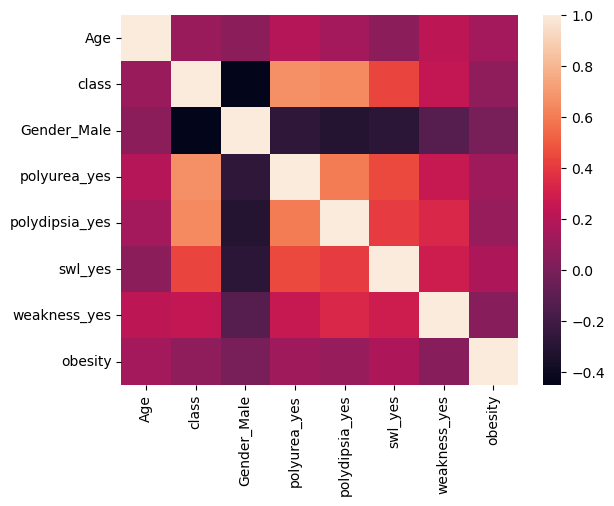

In [28]:
sns.heatmap(df.corr())

In [29]:
x = df.drop('class',axis=1)
y=df['class']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=101,test_size=0.25)

In [83]:
xtrain.shape

(390, 7)

In [84]:
ytrain.shape

(390,)

In [30]:
params = {
    'Cs':[0,1,5,10,15,20,100,200,500,1000],
    'penalty': ['l1,l2','elasticnet'], 
    'l1_ratios': [[0,0.001,0.005,0.01,0.005,0.1,0.5,0.1,0.9,1]],
}
logModel = LogisticRegressionCV(solver='saga',max_iter=100000)
grid = GridSearchCV(logModel,param_grid=params)


In [31]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=LogisticRegressionCV(max_iter=100000, solver='saga'),
             param_grid={'Cs': [0, 1, 5, 10, 15, 20, 100, 200, 500, 1000],
                         'l1_ratios': [[0, 0.001, 0.005, 0.01, 0.005, 0.1, 0.5,
                                        0.1, 0.9, 1]],
                         'penalty': ['l1,l2', 'elasticnet']})

In [32]:
gridpreds = grid.predict(xtest)

In [33]:
accuracy_score(gridpreds,ytest)

0.9

In [34]:
models = {}
models['LogisticRegressionCV'] = accuracy_score(gridpreds,ytest)

In [35]:
mnb = MultinomialNB()
mnb.fit(xtrain,ytrain)

MultinomialNB()

In [36]:
mnbpreds = mnb.predict(xtest)
models['MultinomialNB'] = accuracy_score(mnbpreds,ytest)

In [37]:
models

{'LogisticRegressionCV': 0.9, 'MultinomialNB': 0.8692307692307693}

In [38]:
gnb = GaussianNB()
gnb.fit(xtrain,ytrain)
gnbpreds = gnb.predict(xtest)
models['GaussianNB'] = accuracy_score(gnbpreds,ytest)

In [39]:
models

{'LogisticRegressionCV': 0.9,
 'MultinomialNB': 0.8692307692307693,
 'GaussianNB': 0.8846153846153846}

In [40]:
bnb = BernoulliNB()
bnb.fit(xtrain,ytrain)
bnbpreds = bnb.predict(xtest)
models['BernoulliNB'] = accuracy_score(bnbpreds,ytest)

In [41]:
models

{'LogisticRegressionCV': 0.9,
 'MultinomialNB': 0.8692307692307693,
 'GaussianNB': 0.8846153846153846,
 'BernoulliNB': 0.8538461538461538}

In [42]:
paramgrid = {
    'criterion':["gini", "entropy", "log_loss"],
    'splitter':['best','random'],
    'max_depth':[None,1,2,5,10,20,25,50,100,200]
}

tree = DecisionTreeClassifier()

treeGrid = GridSearchCV(tree,paramgrid)


In [43]:
treeGrid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 1, 2, 5, 10, 20, 25, 50, 100, 200],
                         'splitter': ['best', 'random']})

In [44]:
gridPreds = treeGrid.predict(xtest)
models['DecisionTreeClassifier'] = accuracy_score(gridPreds,ytest)

In [48]:
forest = RandomForestClassifier()
params = {
    'n_estimators':[1,5,10,20,50,100,200,500,1000,1500,2000,2500,3000,5000,10000],
    'criterion':["gini", "entropy", "log_loss"],
    'max_depth':[None,1,2,5,10,20,25,50,100,200]
}

forestModel = GridSearchCV(forest,params)


In [49]:
forestModel.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 1, 2, 5, 10, 20, 25, 50, 100, 200],
                         'n_estimators': [1, 5, 10, 20, 50, 100, 200, 500, 1000,
                                          1500, 2000, 2500, 3000, 5000,
                                          10000]})

In [50]:
forestpreds = forestModel.predict(xtest)
models['RandomForestClassifier']=accuracy_score(ytest,forestpreds)

In [53]:
knn = KNeighborsClassifier()
params = {
    'n_neighbors': [1,2,5,10,15,20,25,50,100],
    'weights':['uniform', 'distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'metric':['cityblock','cosine','euclidean','haversine','l1','l2','manhattan','nan_euclidean']
}

knngrid = GridSearchCV(knn,params)

In [78]:
knngrid.fit(xtrain,ytrain)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['cityblock', 'cosine', 'euclidean',
                                    'haversine', 'l1', 'l2', 'manhattan',
                                    'nan_euclidean'],
                         'n_neighbors': [1, 2, 5, 10, 15, 20, 25, 50, 100],
                         'weights': ['uniform', 'distance']})

In [79]:
knnnpreds = knngrid.predict(xtest)
models['KNearestNeighbors'] = accuracy_score(ytest,knnnpreds)

In [57]:
booster = xgb.XGBClassifier()

In [58]:
booster.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [59]:
xgpreds = booster.predict(xtest)

In [60]:
models['XGBoostClassifier'] = accuracy_score(xgpreds,ytest)

In [61]:
models

{'LogisticRegressionCV': 0.9,
 'MultinomialNB': 0.8692307692307693,
 'GaussianNB': 0.8846153846153846,
 'BernoulliNB': 0.8538461538461538,
 'DecisionTreeClassifier': 0.9615384615384616,
 'RandomForestClassifier': 0.9615384615384616,
 'KNearestNeighbors': 0.9769230769230769,
 'XGBoostClassifier': 0.9615384615384616}

In [65]:
sorted(models)

['BernoulliNB',
 'DecisionTreeClassifier',
 'GaussianNB',
 'KNearestNeighbors',
 'LogisticRegressionCV',
 'MultinomialNB',
 'RandomForestClassifier',
 'XGBoostClassifier']

dict_values([0.9, 0.8692307692307693, 0.8846153846153846, 0.8538461538461538, 0.9615384615384616, 0.9615384615384616, 0.9769230769230769, 0.9615384615384616])

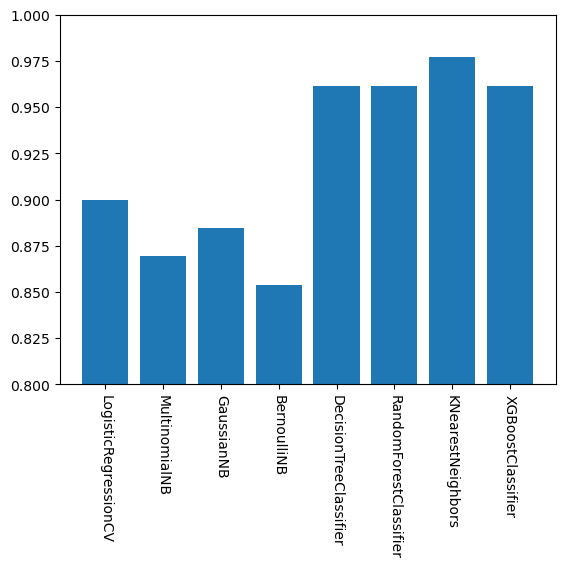

In [77]:
names = list(models.keys())
values = list(models.values())

plt.bar(range(len(models)), values, tick_label=names)
plt.xticks(rotation=-90)
plt.ylim(0.8,1)
plt.show()


In [80]:
knngrid.best_params_

{'algorithm': 'auto',
 'metric': 'cosine',
 'n_neighbors': 20,
 'weights': 'distance'}

In [81]:
forestModel.best_params_

{'criterion': 'entropy', 'max_depth': 25, 'n_estimators': 10}